# Comparison of results dependent on parameters

In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), '..'))

import re
import numpy as np
import yaml
import pint
unit_registry = pint.UnitRegistry()

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from  plotly import colors
from matplotlib import pyplot as plt
import seaborn as sns

import pandas as pd

from rdkit import Chem
from rdkit.Chem import Draw, PandasTools, rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D, IPythonConsole

rdDepictor.SetPreferCoordGen(True)
from IPython.display import SVG
import rdkit

from svgutils import transform as sg

from IPython.core.display import HTML
from svgutils import transform as sg

from PLBenchmarks import targets, ligands, edges

from tqdm.notebook import tqdm

from ipywidgets import interact

import benchmarkpl
from benchmarkpl import drawing
path = benchmarkpl.__path__[0]

In [2]:
targets.set_data_dir(path)
results_dir = '10_results'

In [3]:
all_edges = pd.read_csv('../01_inspect/01f_all_edges_all_ffs_parameters.csv')
all_edges.index=all_edges.iloc[:,0]
all_edges.head()

,Unnamed: 0,DDG_Consensus_OpenFF_GAFF2,DDG_Consensus_OpenFF_GAFF2_cGenFF,DDG_Consensus_all,DDG_Exp.,DDG_GAFF2,DDG_OPLS3e,DDG_OpenFF-1.0,DDG_OpenFF-1.0_converged,DDG_OpenFF-1.2,...,openff-2.0.0.offxml_t86,openff-2.0.0.offxml_t9,openff-2.0.0.offxml_t90,openff-2.0.0.offxml_t93,openff-2.0.0.offxml_t94,openff-2.0.0.offxml_t95,openff-2.0.0.offxml_t96,openff-2.0.0.offxml_t97,target,unit
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
jnk1_edge_17124-1_18631-1,jnk1_edge_17124-1_18631-1,1.044876,0.906112,1.482263,0.26,1.331262,1.517686,1.190000,1.190000,NaN,...,False,False,False,False,False,True,False,False,jnk1,kilocalories / mole
jnk1_edge_17124-1_18634-1,jnk1_edge_17124-1_18634-1,0.598604,0.522556,0.468413,-0.33,0.499522,0.583174,0.580000,0.580000,NaN,...,False,False,False,False,False,False,False,False,jnk1,kilocalories / mole
jnk1_edge_18626-1_18624-1,jnk1_edge_18626-1_18624-1,0.996033,0.689516,0.826727,0.38,1.125717,1.073136,0.556667,0.556667,NaN,...,False,False,False,False,False,False,False,False,jnk1,kilocalories / mole
jnk1_edge_18626-1_18625-1,jnk1_edge_18626-1_18625-1,0.614321,0.381663,0.913932,0.77,0.707457,1.445985,-0.030000,-0.030000,NaN,...,False,False,False,False,False,False,False,False,jnk1,kilocalories / mole
jnk1_edge_18626-1_18627-1,jnk1_edge_18626-1_18627-1,0.454101,0.369656,0.265940,0.39,0.432600,0.396750,0.140000,0.140000,NaN,...,False,False,False,False,False,False,False,False,jnk1,kilocalories / mole


In [4]:
identifiers = [idx[4:] for idx in all_edges.columns if idx.startswith("DDG")]
identifiers

['Consensus_OpenFF_GAFF2',
 'Consensus_OpenFF_GAFF2_cGenFF',
 'Consensus_all',
 'Exp.',
 'GAFF2',
 'OPLS3e',
 'OpenFF-1.0',
 'OpenFF-1.0_converged',
 'OpenFF-1.2',
 'OpenFF-1.2_converged',
 'OpenFF-2.0',
 'OpenFF-2.0_converged',
 'cGenFF']

In [5]:
improved_edges = all_edges[(all_edges['abserror_OpenFF-1.0_converged'] > 1.0) & (all_edges['abserror_OpenFF-2.0_converged'] < 1.0)]

In [6]:
improved_edges["diff"] = [np.fabs(row['DDG_OpenFF-2.0_converged']-row['DDG_OpenFF-1.0_converged']) for i, row in improved_edges.iterrows()]

/home/dhahn3/miniconda3/envs/off/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
improved_edges = improved_edges.sort_values(by="diff", ascending=False)
improved_edges = improved_edges[improved_edges["diff"] > 1.5]
improved_edges.shape

(35, 456)

In [8]:
for i, row in improved_edges.iterrows():
    improved_edges.loc[i, 'Perturbation'] = drawing.create_perturbation_visualization(row)

In [9]:
def make_html(edges_df):
    columns = ['Perturbation', 'target', 'ligandA', 'ligandB']
    for i, idx in enumerate(['Exp.', 'OpenFF-1.0_converged', 'OpenFF-2.0_converged']):
        edges_df.loc[:,f'DDG {idx}'] = [
            f'{np.round(row[f"DDG_{idx}"], 1)} ({np.round(row[f"dDDG_{idx}"], 1)})' 
            for i, row in edges_df.iterrows()
        ] 
        columns.append(f'DDG {idx}')
    for i, row in edges_df.iterrows():
        parameters = []
        for p, c in row.iteritems():
            if re.match("^[abtin][0-9]*$", p) and c:
                print(c)
                parameters.append(p)
        edges_df.loc[i, "Parameters"] = ",".join(parameters)
    columns.append("diff")
    columns.append("Parameters")
    edges_df = edges_df[columns]
    edges_df.reset_index(inplace=True, drop=True)
    html = edges_df.to_html(escape=False, col_space='400px', float_format=lambda x: f'{x:.1f}')
    return html

HTML(make_html(improved_edges))

In [10]:
all_edges_pert_OFF1 = all_edges
#drop all nonconverged edges
all_edges_pert_OFF1.drop([c for c in all_edges_pert_OFF1.columns if c.startswith("openff-2.0.0.offxml")], axis=1, inplace=True)
all_edges_pert_OFF1.rename({c: c.split("_")[1] for c in all_edges_pert_OFF1.columns if c.startswith("openff-1.0.0.offxml")}, axis=1, inplace=True)
all_edges.head()

,Unnamed: 0,DDG_Consensus_OpenFF_GAFF2,DDG_Consensus_OpenFF_GAFF2_cGenFF,DDG_Consensus_all,DDG_Exp.,DDG_GAFF2,DDG_OPLS3e,DDG_OpenFF-1.0,DDG_OpenFF-1.0_converged,DDG_OpenFF-1.2,...,t86,t9,t90,t93,t94,t95,t96,t97,target,unit
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
jnk1_edge_17124-1_18631-1,jnk1_edge_17124-1_18631-1,1.044876,0.906112,1.482263,0.26,1.331262,1.517686,1.190000,1.190000,NaN,...,False,False,False,False,False,True,False,False,jnk1,kilocalories / mole
jnk1_edge_17124-1_18634-1,jnk1_edge_17124-1_18634-1,0.598604,0.522556,0.468413,-0.33,0.499522,0.583174,0.580000,0.580000,NaN,...,False,False,False,False,False,False,False,False,jnk1,kilocalories / mole
jnk1_edge_18626-1_18624-1,jnk1_edge_18626-1_18624-1,0.996033,0.689516,0.826727,0.38,1.125717,1.073136,0.556667,0.556667,NaN,...,False,False,False,False,False,False,False,False,jnk1,kilocalories / mole
jnk1_edge_18626-1_18625-1,jnk1_edge_18626-1_18625-1,0.614321,0.381663,0.913932,0.77,0.707457,1.445985,-0.030000,-0.030000,NaN,...,False,False,False,False,False,False,False,False,jnk1,kilocalories / mole
jnk1_edge_18626-1_18627-1,jnk1_edge_18626-1_18627-1,0.454101,0.369656,0.265940,0.39,0.432600,0.396750,0.140000,0.140000,NaN,...,False,False,False,False,False,False,False,False,jnk1,kilocalories / mole


## Correlation between parameters

In [11]:
para = all_edges_pert_OFF1[[x  for x in all_edges_pert_OFF1.columns if re.match("^[abtin][0-9]*$", x)]]

In [12]:
from sklearn import metrics
corr = para.corr(method=metrics.matthews_corrcoef)

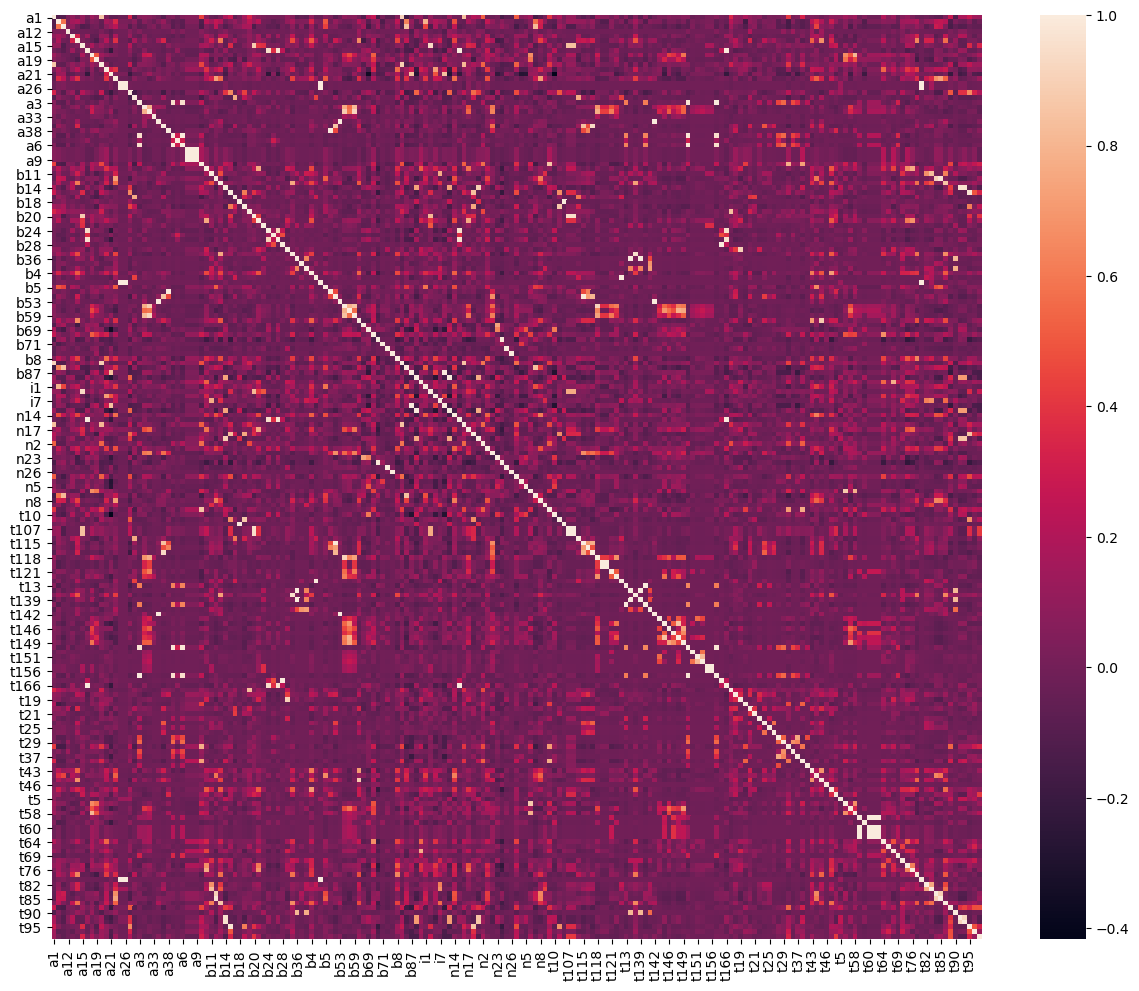

In [13]:
fig = plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.savefig("03e_parameter_correlation.png", bbox_inches="tight")

## Calculate difference and significance between parameters

In [14]:
n_boot=1000
ci=0.95
l = []
print(all_edges_pert_OFF1.shape)
ind = ~all_edges_pert_OFF1[["abserror_OpenFF-1.0_converged", "abserror_OpenFF-2.0_converged"]].isna().any(axis=1)
all_edges_pert_OFF1 =  all_edges_pert_OFF1[ind.values]
print(all_edges_pert_OFF1.shape)
for p in all_edges_pert_OFF1.columns:
    if not re.match('^[batin][0-9]*$', p):
        continue
    else:
        s = all_edges_pert_OFF1.loc[all_edges_pert_OFF1[p]]
        if s.shape[0] > 3:
            size = s.shape[0]
            ntargets = len(s.target.unique())
            rmse_off1 = np.sqrt(np.sum(s["abserror_OpenFF-1.0_converged"]**2)/size)
            rmse_off2 = np.sqrt(np.sum(s["abserror_OpenFF-2.0_converged"]**2)/size)
            diff = rmse_off2 - rmse_off1
            dist_rmse_off1 = []
            dist_rmse_off2 = []
            dist_diff = []
            for i in range(n_boot):
                ind = np.random.choice(size, size, replace=True)
                ro1 = np.sqrt(np.sum(s["abserror_OpenFF-1.0_converged"][ind]**2)/size)
                ro2 = np.sqrt(np.sum(s["abserror_OpenFF-2.0_converged"][ind]**2)/size)
                dist_rmse_off1.append(ro1)
                dist_rmse_off2.append(ro2)
                dist_diff.append(ro2-ro1)
            dist_rmse_off1 = np.sort(dist_rmse_off1)
            dist_rmse_off2 = np.sort(dist_rmse_off2)
            dist_diff = np.sort(dist_diff)
            low_frac = (1-ci)/2.0
            high_frac = 1 - low_frac
            signif = False
            if dist_diff[int(np.floor(n_boot*(1-ci)))] > 0 and \
                    dist_diff[int(np.ceil(n_boot*ci))] > 0:
                signif = True
            if dist_diff[int(np.floor(n_boot*(1-ci)))] < 0 and \
                    dist_diff[int(np.ceil(n_boot*ci))] < 0:
                signif = True
            
            l.append([p, 
                      "OpenFF-1.0", 
                      rmse_off1, 
                      np.mean(dist_rmse_off1),
                      np.std(dist_rmse_off1),
                    dist_rmse_off1[int(np.floor(n_boot*low_frac))],
                    dist_rmse_off1[int(np.ceil(n_boot*high_frac))],
                      signif,
                      size,
                      ntargets
                      ])
            l.append([p, 
                      "OpenFF-2.0", 
                      rmse_off2, 
                      np.mean(dist_rmse_off2),
                      np.std(dist_rmse_off2),
                    dist_rmse_off2[int(np.floor(n_boot*low_frac))],
                    dist_rmse_off2[int(np.ceil(n_boot*high_frac))],
                      signif,
                      size,
                      ntargets
                      ])
            l.append([p, 
                      "Diff", 
                      diff, 
                      np.mean(dist_diff),
                      np.std(dist_diff),
                    dist_diff[int(np.floor(n_boot*low_frac))],
                    dist_diff[int(np.ceil(n_boot*high_frac))],
                      signif,
                      size,
                      ntargets
                      ])
ddf = pd.DataFrame(l, columns=["Parameter", "Forcefield", "RMSE", "Mean", "std", "low", 'high', "signif", "size", "ntargets"])
ddf

(1128, 251)
(764, 251)


,Parameter,Forcefield,RMSE,Mean,std,low,high,signif,size,ntargets
0,a1,OpenFF-1.0,1.408328,1.406440,0.058263,1.291700,1.525587,False,574,22
1,a1,OpenFF-2.0,1.352390,1.350664,0.056145,1.243927,1.465349,False,574,22
2,a1,Diff,-0.055938,-0.055775,0.059260,-0.172212,0.057499,False,574,22
3,a10,OpenFF-1.0,1.420510,1.417263,0.056820,1.305941,1.529300,False,569,21
4,a10,OpenFF-2.0,1.358758,1.358211,0.054807,1.256121,1.464465,False,569,21
...,...,...,...,...,...,...,...,...,...,...
517,t96,OpenFF-2.0,1.021077,1.019844,0.095264,0.838705,1.209688,False,70,10
518,t96,Diff,-0.194251,-0.185586,0.147037,-0.494940,0.095169,False,70,10
519,t97,OpenFF-1.0,1.432780,1.421235,0.189133,1.062410,1.792069,False,45,10
520,t97,OpenFF-2.0,1.276501,1.274365,0.144091,0.999871,1.571244,False,45,10


### Calculate overall results

In [15]:
s = all_edges_pert_OFF1
size = s.shape[0]
ntargets = len(s.target.unique())
rmse_off1 = np.sqrt(np.sum(s["abserror_OpenFF-1.0_converged"]**2)/size)
rmse_off2 = np.sqrt(np.sum(s["abserror_OpenFF-2.0_converged"]**2)/size)
diff = rmse_off2 - rmse_off1
dist_rmse_off1 = []
dist_rmse_off2 = []
dist_diff = []
for i in range(n_boot):
    ind = np.random.choice(size, size, replace=True)
    ro1 = np.sqrt(np.sum(s["abserror_OpenFF-1.0_converged"][ind]**2)/size)
    ro2 = np.sqrt(np.sum(s["abserror_OpenFF-2.0_converged"][ind]**2)/size)
    dist_rmse_off1.append(ro1)
    dist_rmse_off2.append(ro2)
    dist_diff.append(ro2-ro1)
dist_rmse_off1 = np.sort(dist_rmse_off1)
dist_rmse_off2 = np.sort(dist_rmse_off2)
dist_diff = np.sort(dist_diff)
low_frac = (1-ci)/2.0
high_frac = 1 - low_frac
signif = False
if dist_diff[int(np.floor(n_boot*(1-ci)))] > 0 and \
                    dist_diff[int(np.ceil(n_boot*ci))] > 0:
    signif = True
if dist_diff[int(np.floor(n_boot*(1-ci)))] < 0 and \
                    dist_diff[int(np.ceil(n_boot*ci))] < 0:
    signif = True
all_list = []
all_list.append(["all", 
                      "OpenFF-1.0", 
                      rmse_off1, 
                      np.mean(dist_rmse_off1),
                      np.std(dist_rmse_off1),
                    dist_rmse_off1[int(np.floor(n_boot*low_frac))],
                    dist_rmse_off1[int(np.ceil(n_boot*high_frac))],
                      signif,
                      size,
                      ntargets
                      ])
all_list.append(["all", 
                      "OpenFF-2.0", 
                      rmse_off2, 
                      np.mean(dist_rmse_off2),
                      np.std(dist_rmse_off2),
                    dist_rmse_off2[int(np.floor(n_boot*low_frac))],
                    dist_rmse_off2[int(np.ceil(n_boot*high_frac))],
                      signif,
                      size,
                      ntargets
                      ])
all_list.append(["all", 
                      "Diff", 
                      diff, 
                      np.mean(dist_diff),
                      np.std(dist_diff),
                    dist_diff[int(np.floor(n_boot*low_frac))],
                    dist_diff[int(np.ceil(n_boot*high_frac))],
                      signif,
                      size,
                      ntargets
                      ])
all_list

[['all',
  'OpenFF-1.0',
  1.3839936816192733,
  1.3852184570826922,
  0.04796081782386737,
  1.2972076837843314,
  1.4806169806527696,
  False,
  764,
  22],
 ['all',
  'OpenFF-2.0',
  1.3163127686186094,
  1.315325304455182,
  0.0461316998428288,
  1.2211715412261457,
  1.4066726270106888,
  False,
  764,
  22],
 ['all',
  'Diff',
  -0.06768091300066392,
  -0.06989315262751024,
  0.04730072863020102,
  -0.1606750540357016,
  0.024494948908567293,
  False,
  764,
  22]]

### get parameters with significant changes

In [16]:
to_plot = ddf[ddf["signif"]]

### Indicate which parameters changed most

In [17]:
parameter_change = pd.read_csv("../01_inspect/01d_off_parameter_changes.csv")
parameter_change.index = parameter_change.id

In [18]:
to_plot["Parameter_old"] = to_plot["Parameter"]
for i, row in to_plot.iterrows():
    pid = row["Parameter_old"]
    big_change = parameter_change.loc[pid, "big_change"]
    new_id = pid
    if big_change > 0.5:
        new_id = f"*{pid}"
    if big_change > 1.5:
        new_id = f"**{pid}"
    if big_change > 2.5:
        new_id = f"***{pid}"
    to_plot.loc[i, "Parameter"] = new_id

/home/dhahn3/miniconda3/envs/off/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/dhahn3/miniconda3/envs/off/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [19]:

to_plot = to_plot[to_plot["ntargets"]>2]

### Redo correlation with parameters which change significantly

In [20]:
corr_sig = corr.loc[to_plot["Parameter_old"].unique(),to_plot["Parameter_old"].unique()]

In [21]:
corr_sig[corr_sig < 0.0] = 0.0

In [22]:
from sklearn import cluster
clustering = cluster.SpectralClustering(n_clusters=15, affinity='precomputed').fit(corr_sig)
clustering.labels_

array([ 0,  6, 10,  0,  8, 11,  9,  4,  7, 13, 11,  0,  9,  2,  6, 13, 13,
       11,  7,  0,  0,  0, 12,  8,  6,  0,  8, 13, 10, 13,  9, 12, 11,  2,
        6,  6,  4,  3,  3, 14,  5,  5,  0, 13,  0,  0,  1,  1, 13, 13,  0,
       11, 11,  0,  9], dtype=int32)

In [23]:
cl = pd.DataFrame([[x, y] for x, y in zip(corr_sig.index, clustering.labels_)]).sort_values(by=0)
print(cl)
d = {}
for i in range(cl[1].max()+1):
    for j, row in cl.iterrows():
        if row[1] not in d:
            print(row[1], i)
            d[row[1]] = i
            break

for j, row in cl.iterrows():
    cl.loc[j,1] = d[row[1]]
cl.sort_values(by=[1, 0], inplace=True)
d, cl

       0   1
0    a14   0
1    a15   6
2     a2  10
3    a20   0
4    a21   8
5    a22  11
6    a29   9
7    a32   4
8    a38   7
9    b10  13
10   b12  11
11   b13   0
12   b16   9
13   b18   2
14   b20   6
15   b21  13
16    b4  13
17    b5  11
18   b51   7
19    b6   0
20    b7   0
21    b8   0
22   b85  12
23   b87   8
24    i2   6
25    i4   0
26   n11   8
27   n14  13
28   n16  10
29   n17  13
30   n18   9
31    n7  12
32    n8  11
33  t106   2
34  t107   6
35  t110   6
36  t121   4
37   t13   3
38   t14   3
39  t140  14
40  t145   5
41  t148   5
42   t43   0
43   t47  13
44   t50   0
45   t64   0
46   t66   1
47   t73   1
48   t74  13
49   t76  13
50   t80   0
51   t84  11
52   t85  11
53   t86   0
54   t95   9
0 0
6 1
10 2
8 3
11 4
9 5
4 6
7 7
13 8
2 9
12 10
3 11
14 12
5 13
1 14


({0: 0,
  6: 1,
  10: 2,
  8: 3,
  11: 4,
  9: 5,
  4: 6,
  7: 7,
  13: 8,
  2: 9,
  12: 10,
  3: 11,
  14: 12,
  5: 13,
  1: 14},
        0   1
 0    a14   0
 3    a20   0
 11   b13   0
 19    b6   0
 20    b7   0
 21    b8   0
 25    i4   0
 42   t43   0
 44   t50   0
 45   t64   0
 50   t80   0
 53   t86   0
 1    a15   1
 14   b20   1
 24    i2   1
 34  t107   1
 35  t110   1
 2     a2   2
 28   n16   2
 4    a21   3
 23   b87   3
 26   n11   3
 5    a22   4
 10   b12   4
 17    b5   4
 32    n8   4
 51   t84   4
 52   t85   4
 6    a29   5
 12   b16   5
 30   n18   5
 54   t95   5
 7    a32   6
 36  t121   6
 8    a38   7
 18   b51   7
 9    b10   8
 15   b21   8
 16    b4   8
 27   n14   8
 29   n17   8
 43   t47   8
 48   t74   8
 49   t76   8
 13   b18   9
 33  t106   9
 22   b85  10
 31    n7  10
 37   t13  11
 38   t14  11
 39  t140  12
 40  t145  13
 41  t148  13
 46   t66  14
 47   t73  14)

In [24]:
corr_sig = corr_sig.loc[cl[0],cl[0]]

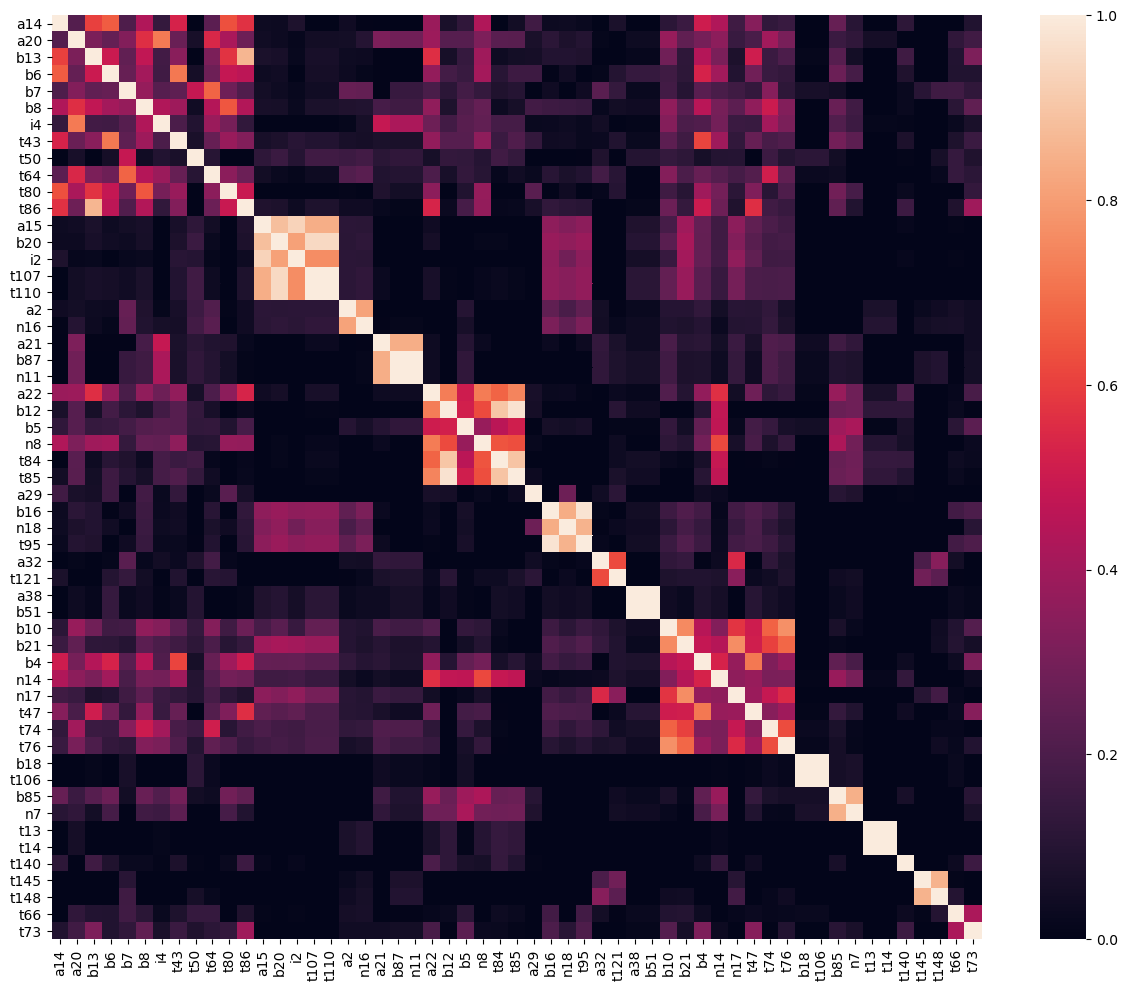

In [25]:
fig = plt.figure(figsize=(15,12))
sns.heatmap(corr_sig)
plt.savefig("03e_parameter_correlation_significant.png", bbox_inches="tight")

In [26]:
for nc in range(18):
    paras = cl[cl[1]==nc][0].values
    edges = all_edges_pert_OFF1
    for p in paras:
        edges = edges[edges[p]]
    print(nc, edges.shape[0], paras, parameter_change.loc[paras, "smirks"].values)
    # get only 10 examples per parameter, remove ".iloc[:10]" for all examples
    for i, e in edges.iloc[:10].iterrows():
        if np.fabs(e["abserror_OpenFF-2.0_converged"] - e["abserror_OpenFF-1.0_converged"]) > 1:
            svg = drawing.create_perturbation_visualization(e)#, redraw=True)
            fig = sg.fromstring(svg)
            text = f"DDG(EXP)={e['DDG_Exp.']:.1f};DDG(OFF1)={e['DDG_OpenFF-1.0_converged']:.1f};DDG(OFF2)={e['DDG_OpenFF-2.0_converged']:.1f}"  
            label = sg.TextElement(300, 35, f'{text}', size=15, 
                       font='sans-serif', anchor='middle', color='black')
            fig.append(label) 
            img = fig.to_str().decode("utf-8")
            with open(f"03e_cluster_{nc}_{i}.svg", 'w') as file:
                file.write(img)

0 1 ['a14' 'a20' 'b13' 'b6' 'b7' 'b8' 'i4' 't43' 't50' 't64' 't80' 't86'] ['[*:1]~;!@[*;X3;r5:2]~;@[*;r5:3]'
 '[*:1]~[#7X3$(*~[#6X3,#6X2,#7X2+0]):2]~[*:3]' '[#6X3:1]=[#7X2,#7X3+1:2]'
 '[#6X3:1]=[#6X3:2]' '[#6:1]-[#7:2]' '[#6X3:1]-[#7X3:2]'
 '[*:1]~[#7X3$(*~[#6X3]):2](~[*:3])~[*:4]' '[*:1]~[#6X3:2]-[#6X3:3]~[*:4]'
 '[*:1]-[#6X4:2]-[#7X4:3]-[*:4]'
 '[*:1]-[#6X4:2]-[#7X3$(*~[#6X3,#6X2]):3]~[*:4]'
 '[*:1]-[#7X3;r5:2]-@[#6X3;r5:3]~[*:4]' '[*:1]-,:[#6X3:2]=[#7X2:3]-[*:4]']
1 22 ['a15' 'b20' 'i2' 't107' 't110'] ['[#8X1:1]~[#6X3:2]~[#8:3]' '[#6X3:1](=[#8X1])-[#8X2H0:2]'
 '[*:1]~[#6X3:2](~[#8X1:3])~[#8:4]'
 '[*:1]~[#6X3:2](=[#8,#16,#7])-[#8X2H0:3]-[*:4]'
 '[#8,#16,#7:1]=[#6X3:2]-[#8X2H0:3]-[#6X4:4]']
2 512 ['a2' 'n16'] ['[#1:1]-[#6X4:2]-[#1:3]' '[#6X4:1]']
3 621 ['a21' 'b87' 'n11'] ['[#1:1]-[#7X3$(*~[#6X3,#6X2,#7X2+0]):2]-[*:3]' '[#7:1]-[#1:2]'
 '[#1:1]-[#7]']
4 106 ['a22' 'b12' 'b5' 'n8' 't84' 't85'] ['[*:1]~[#7X2+0:2]~[*:3]' '[#6X3:1]:[#7X2,#7X3+1:2]' '[#6X3:1]:[#6X3:2]'
 '[#1:1]-[#6X3]~[#7,#

In [27]:
order = [to_plot[to_plot["Parameter_old"]==p]["Parameter"].iloc[0] for p in cl[0]]

<Figure size 1200x600 with 0 Axes>

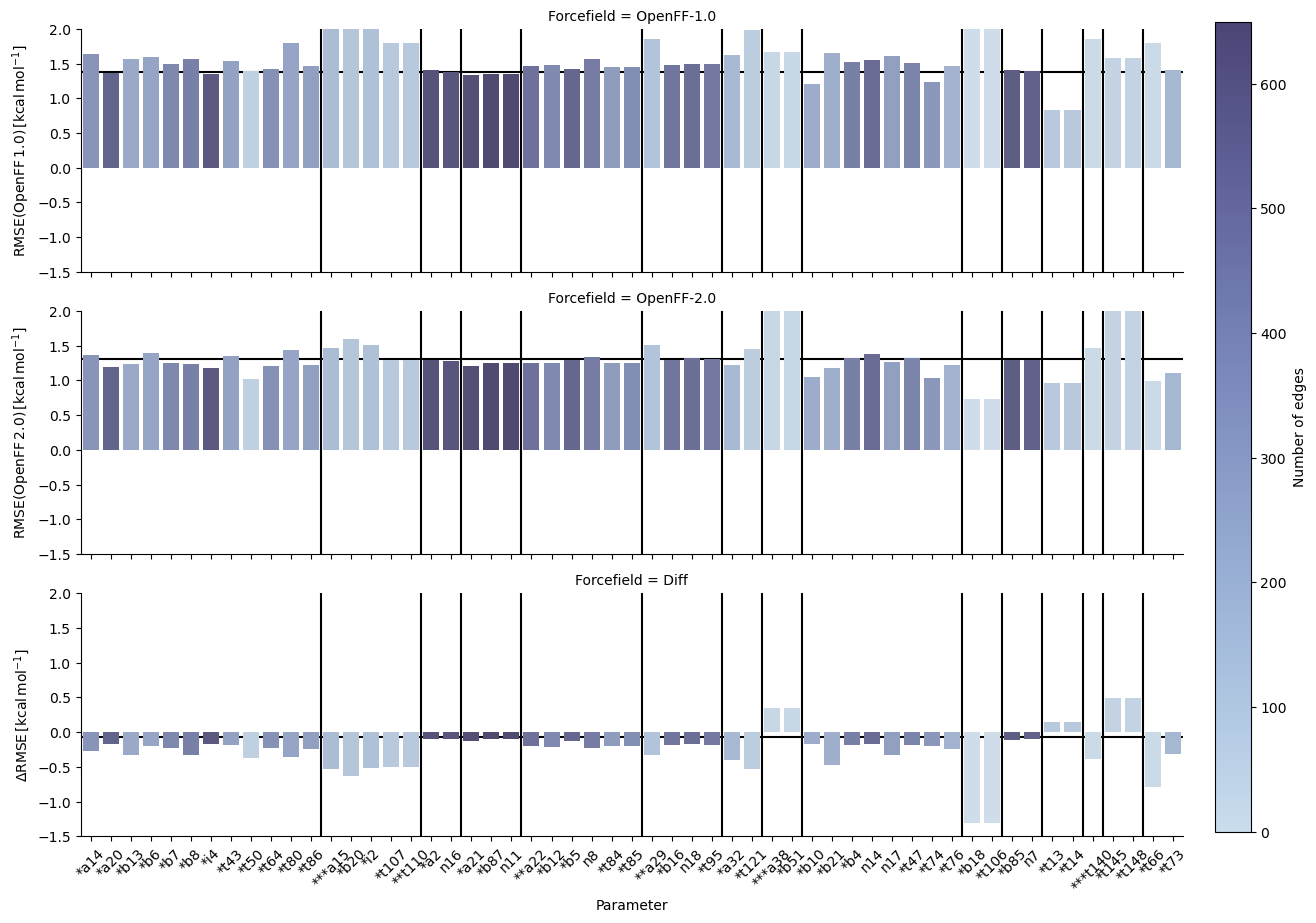

In [28]:
fig = plt.figure(figsize=(12,6))
#to_plot = to_plot[[d.startswith("t") for d in to_plot.Parameter]]
norm = plt.Normalize(0, to_plot["size"].max())
sm = plt.cm.ScalarMappable(cmap=sns.cubehelix_palette(start=.2, rot=-.2, dark=.3, as_cmap=True), norm=norm)
sm.set_array([])

g = sns.FacetGrid(data=to_plot,  
                  hue="size", 
                  row="Forcefield",
                  aspect=4, 
                  palette="ch:start=.2,rot=-.2,dark=.3",)
g.map(sns.barplot, "Parameter", "RMSE", order=order)
ax = plt.gcf().get_axes()
ax[0].axhline(y=rmse_off1, color='k', zorder=-1)
ax[1].axhline(y=rmse_off2, color='k', zorder=-1)
ax[2].axhline(y=diff, color='k', zorder=-1)
ax[0].set_ylabel(r'$\mathrm{RMSE(OpenFF\,1.0)}\,[\mathrm{kcal\,mol^{-1}}]$')
ax[1].set_ylabel(r'$\mathrm{RMSE(OpenFF\,2.0)}\,[\mathrm{kcal\,mol^{-1}}]$')
ax[2].set_ylabel(r'$\Delta \mathrm{RMSE}\,[\mathrm{kcal\,mol^{-1}}]$')
ax[0].set_ylim(-1.5,2)
c = 0
for i, (n, row) in enumerate(cl.iterrows()):
    if row[1] != c:
        ax[0].axvline(x=i-0.5, color='k', zorder=-2)
        ax[1].axvline(x=i-0.5, color='k', zorder=-2)
        ax[2].axvline(x=i-0.5, color='k', zorder=-2)
        c = row[1]
t = plt.xticks(rotation=45)
cbar_ax = g.fig.add_axes([1.01, 0.07, 0.03, 0.9])
g.fig.colorbar(sm, cax=cbar_ax, label="Number of edges")
plt.savefig("03e_significant_ff_improvements_per_parameter.png", bbox_inches="tight")

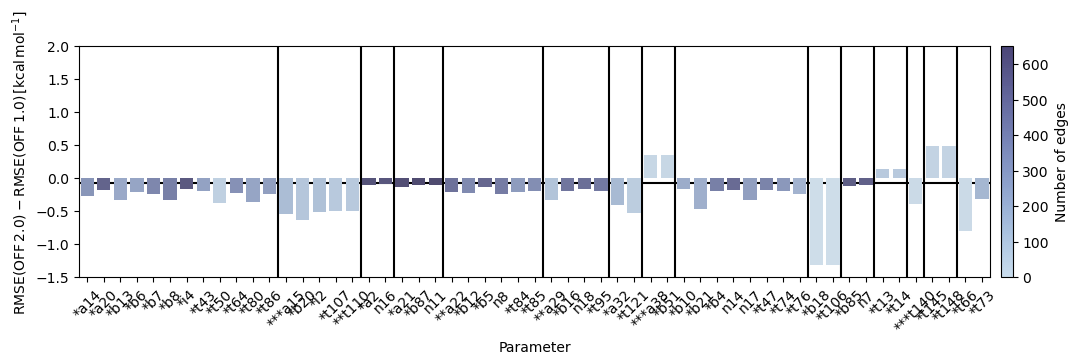

In [29]:
fig = plt.figure(figsize=(14,3))
#to_plot = to_plot[[d.startswith("t") for d in to_plot.Parameter]]
norm = plt.Normalize(0, to_plot["size"].max())
sm = plt.cm.ScalarMappable(cmap=sns.cubehelix_palette(start=.2, rot=-.2, dark=.3, as_cmap=True), norm=norm)
sm.set_array([])
sns.barplot(x="Parameter", 
            y="RMSE", 
            data=to_plot[to_plot["Forcefield"]=="Diff"], 
            hue="size", 
            palette="ch:start=.2,rot=-.2,dark=.3",
            order=order,
           dodge=False)
ax = plt.gcf().get_axes()
ax[0].axhline(y=diff, color='k', zorder=-1)
c = 0
for i, (n, row) in enumerate(cl.iterrows()):
    if row[1] != c:
        ax[0].axvline(x=i-0.5, color='k', zorder=-2)
        c = row[1]
plt.ylim(-1.5,2)
plt.ylabel(r'$\mathrm{RMSE(OFF\,2.0)-RMSE(OFF\,1.0)}\,[\mathrm{kcal\,mol^{-1}}]$')
ax[0].get_legend().remove()
ax[0].figure.colorbar(sm, label="Number of edges", pad=0.01)
t = plt.xticks(rotation=45)
plt.savefig("03e_significant_ff_improvements_per_parameter_diff.png", bbox_inches="tight", dpi=600)